<a href="https://colab.research.google.com/github/suafle/Clase2/blob/master/eta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from scipy.interpolate import interpn
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde
from astropy.coordinates import SkyCoord
from astropy.table import Table
from matplotlib.colors import ListedColormap, BoundaryNorm
from astropy import units as u
from astropy.io import fits

In [0]:
#GAIA passbands
gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
gaia = np.loadtxt(gaia_data)

gaia = np.where(gaia==99.99,0,gaia)

gaia_w = gaia[:,0]*10 #Angstrom
gaia_g = gaia[:,1]
gaia_bp = gaia[:,3]
gaia_rp = gaia[:,5]

def inter_g(wavelength): 
  f = interp1d(gaia_w,gaia_g)
  return f(wavelength)
  
def inter_gbp(wavelength): 
  f = interp1d(gaia_w,gaia_bp)
  return f(wavelength)
  
def inter_grp(wavelength): 
  f = interp1d(gaia_w,gaia_rp)
  return f(wavelength)


#WISE passbands
wise1_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W1.txt'
wise2_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W2.txt'
wise3_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W3.txt'
wise4_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W4.txt'

w1 = np.loadtxt(wise1_data)
w2 = np.loadtxt(wise2_data)
w3 = np.loadtxt(wise3_data)
w4 = np.loadtxt(wise4_data)

w1ww = w1[:,0]*1e4
w1r = w1[:,1]

w2ww = w2[:,0]*1e4
w2r = w2[:,1]

w3ww = w3[:,0]*1e4
w3r = w3[:,1]

w4ww = w4[:,0]*1e4
w4r = w4[:,1]

#wavelength must be between 25300 and 65000 A (W1)
#wavelength must be between 25300 and 80000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)


def inter_w1(wavelength): 
  f = interp1d(w1ww,w1r)
  return f(wavelength)
  
def inter_w2(wavelength): 
  f = interp1d(w2ww,w2r)
  return f(wavelength)

def inter_w3(wavelength): 
  f = interp1d(w3ww,w3r)
  return f(wavelength)

def inter_w4(wavelength): 
  f = interp1d(w4ww,w4r)
  return f(wavelength)


In [0]:
#Comparing etas

#Blackbody plot
def bb(Teff,Lbol): 
  c = 2.99792e8 #m s^-1
  cA = c*1e10 #A s**-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  pc = 3.0857e16 #m
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  delta_wave = 100 #Å
  wave_vector = np.arange(1000,3e7,delta_wave) #Check the graph above (also in A)
  d = 10 #pc, to account for absolute magnitudes
  
  #Generate black body spectrum in f_lambda units
  #-----------------------------------------
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave_vector*1e-10)**5)*(1./(np.exp(h*c/(wave_vector*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  flambda_BB_SI = flambda_BB_SI/1e7 # erg s**-1 cm**-2 A**-1
  R = np.sqrt(Lbol*Lsun/(4.*np.pi*sigma_SB*Teff**4)) # m Source radius (considering we know Lbol and Teff)
  flux = flambda_BB_SI*(R/(d*pc))**2 #Flux from the source at 10 pc
  
  fgaia = interp1d(wave_vector,flux)

  ww = np.arange(3000,11000,1)
  g = np.trapz(fgaia(ww) * inter_g(ww) * ww, x=ww) / np.trapz(inter_g(ww) * cA / ww, x=ww)

  ww = np.arange(25300,285000,1)
  w3 = np.trapz(fgaia(ww) * inter_w3(ww) * ww, x=ww) / np.trapz(inter_w3(ww) * cA / ww, x=ww)

  ww = np.arange(25300,285000,1)  
  w4 = np.trapz(fgaia(ww) * inter_w4(ww) * ww, x=ww) / np.trapz(inter_w4(ww) * cA / ww, x=ww)
  
  return(wave_vector,flux,g,w3,w4)

In [34]:
print(bb(5777,1))

(array([1.00000e+03, 1.10000e+03, 1.20000e+03, ..., 2.99997e+07,
       2.99998e+07, 2.99999e+07]), array([2.90729435e-16, 1.73710072e-15, 7.41819736e-15, ...,
       9.43714376e-25, 9.43701795e-25, 9.43689214e-25]), 4.332602248335988e-22, 1.8561037204222648e-23, 4.989496577946066e-24)


9.999999999999995
99.99999999999999
1000.0
10000.0
99999.99999999999
1000000.0
9.999999999999993
99.99999999999991
999.9999999999994
9999.999999999998
99999.99999999994
999999.9999999997
9.999999999999998
100.0
1000.0
10000.0
99999.99999999999
1000000.0000000002


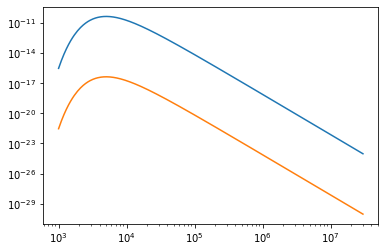

In [36]:
wave1,flux1,g1,w1,ww1 = bb(5777,1)
wave2,flux2,g2,w2,ww2 = bb(5777,0.1)
wave3,flux2,g3,w3,ww3 = bb(5777,0.01)
wave4,flux2,g4,w4,ww4 = bb(5777,0.001)
wave5,flux2,g5,w5,ww5 = bb(5777,0.0001)
wave6,flux2,g6,w6,ww6 = bb(5777,0.00001)
wave7,flux2,g7,w7,ww7 = bb(5777,0.000001)

print(g1/g2)
print(g1/g3)
print(g1/g4)
print(g1/g5)
print(g1/g6)
print(g1/g7)


print(w1/w2)
print(w1/w3)
print(w1/w4)
print(w1/w5)
print(w1/w6)
print(w1/w7)


print(ww1/ww2)
print(ww1/ww3)
print(ww1/ww4)
print(ww1/ww5)
print(ww1/ww6)
print(ww1/ww7)



plt.plot(wave,flux)
plt.plot(wave2,flux2)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.close()